# [MeanderPy](https://github.com/zsylvester/meanderpy)
'meanderpy' es un módulo de Python que implementa un modelo numérico simple de meandros, el cual fue descrito por Howard & Knutson en su artículo de 1984 "Sufficient Conditions for River Meandering: A Simulation Approach". Este es un modelo cinemático basado en el cálculo de la tasa de migración como la suma ponderada de las curvaturas aguas arriba; la velocidad del flujo no entra en la ecuación. La curvatura se transforma en una 'tasa de migración nominal' mediante la multiplicación con una constante de tasa de migración (o erodibilidad); en el artículo de Howard & Knutson (1984) esta es una relación no lineal basada en observaciones de campo que sugirieron un vínculo complejo entre curvatura y tasa de migración. 

**Fuente: https://github.com/zsylvester/meanderpy**

Paper: Sylvester, Z., Durkin, P., and Covault, J.A., 2019, High curvatures drive river meandering: Geology, v. 47, p. 263–266, doi:10.1130/G45608.1.

In [2]:
#Instalación de paquetes
#Quitar comentarios '#' de la siguiente linea la primera y única vez
#!pip install meanderpy

In [10]:
#importamos los paquetes
import meanderpy as mp
import matplotlib.pyplot as plt
import numpy as np

## Parámetros de entrada

In [11]:
nit = 2000                   # number of iterations
W = 200.0                    # channel width (m)
D = 6.0                      # channel depth (m)
depths = D * np.ones((nit,))  # channel depths for different iterations
pad = 100                    # padding (number of nodepoints along centerline)
deltas = 50.0                # sampling distance along centerline
Cfs = 0.011 * np.ones((nit,)) # dimensionless Chezy friction factor
crdist = 2 * W               # threshold distance at which cutoffs occur
kl = 60.0/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
dt = 2*0.05*365*24*60*60.0     # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 20                # which time steps will be saved
n_bends = 30                 # approximate number of bends you want to model
Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
t1 = 500                    # time step when incision starts
t2 = 700                    # time step when lateral migration starts
t3 = 1200                    # time step when aggradation starts
aggr_factor = 2e-9         # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3)

## Condiciones de entrada del modelo

In [12]:
ch = mp.generate_initial_channel(W, depths[0], Sl, deltas, pad, n_bends) # initialize channel
chb = mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[]) # create channel belt object

## Simulación

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 45.02it/s]


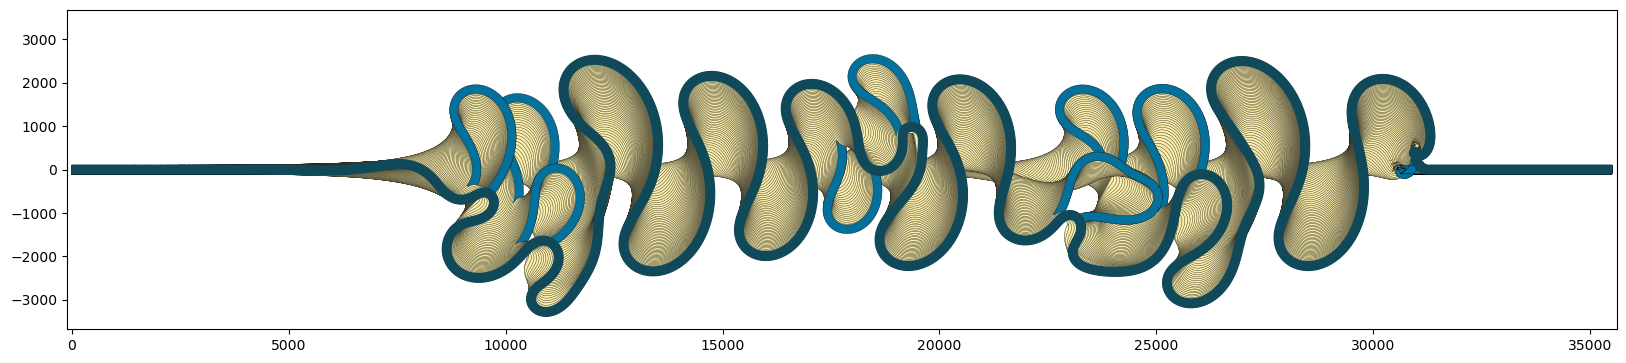

In [6]:
chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
fig = chb.plot('strat', 20, 60, chb.cl_times[-1], len(chb.channels)) # plotting

Mapa con escala de colores de edad de 'scroll bars'

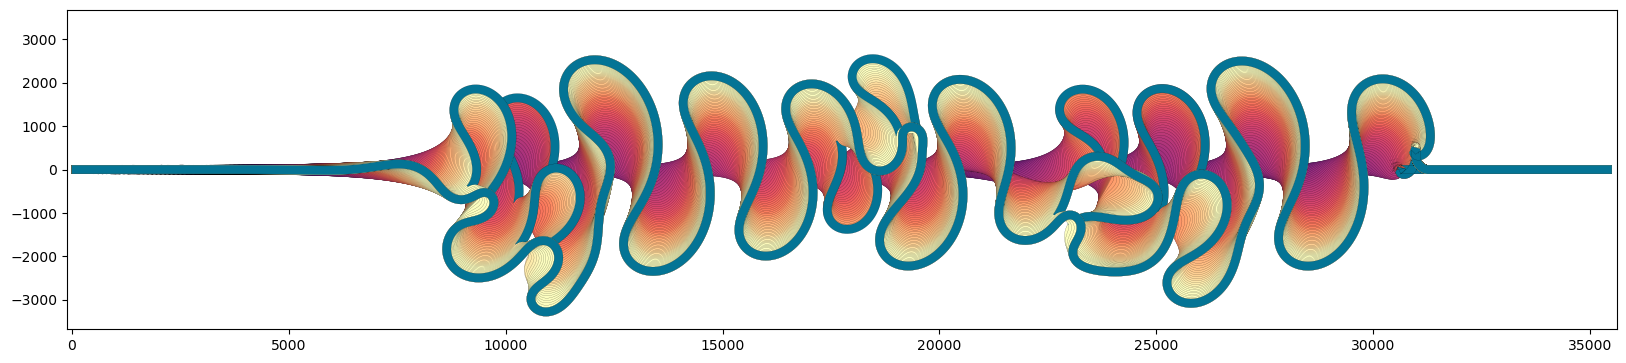

In [7]:
fig = chb.plot('age', 20, 60, chb.cl_times[-1], len(chb.channels))

## Modelación fluvial 3D

In [8]:
h_mud = 1.0 * np.ones((len(chb.channels),)) # thickness of overbank deposit for each time step
dx = 10.0 # gridcell size in meters
diff_scale = 2.0 * W/dx
v_coarse = 10.0 # deposition rate of coarse overbank sediment, in m/year (excluding times of no flooding)
v_fine = 0.0 # deposition rate of fine overbank sediment, in m/year (excluding times of no flooding)

chb_3d, xmin, xmax, ymin, ymax, dists, zmaps = mp.build_3d_model(chb, 'fluvial',
            h_mud=h_mud, h=12.0, w=W,
            bth=0.0, dcr=10.0, dx=dx, delta_s=deltas, dt=dt, starttime=chb.cl_times[0], endtime=chb.cl_times[-1],
            diff_scale=diff_scale, v_fine=v_fine, v_coarse=v_coarse,
            xmin=9000, xmax=15000, ymin=-3500, ymax=3500)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.22it/s]


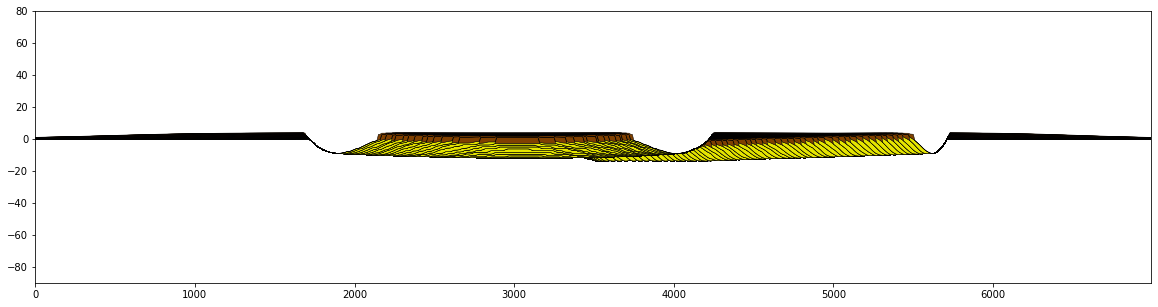

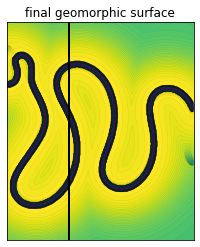

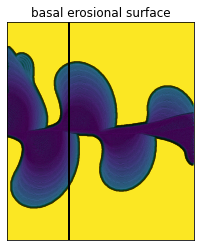

In [ ]:
# create plots
fig1,fig2,fig3 = chb_3d.plot_xsection(200, [[0.9,0.9,0],[0.5,0.25,0]], 10)